## Importing the required libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the file from the desktop

In [15]:
train=pd.read_csv('C:\\Users\\Kiran Sunkar\\Desktop\\train.csv')

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Find Missing data

In [17]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## Visualize the missing data using heatmap

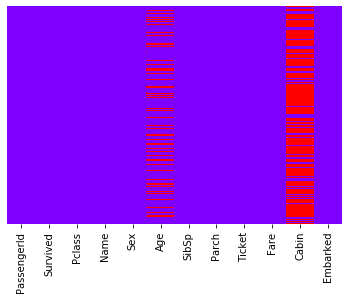

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='rainbow')

#if train.isnull() is true ,those values are visualized using heatmap
#cbar=whether to draw a color bar

## See how many people got survived

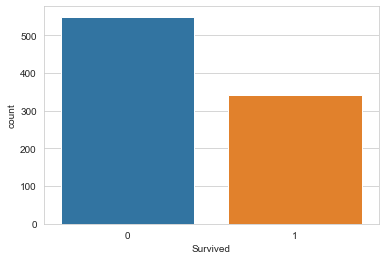

In [34]:
#sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived')

## Male and Female survival

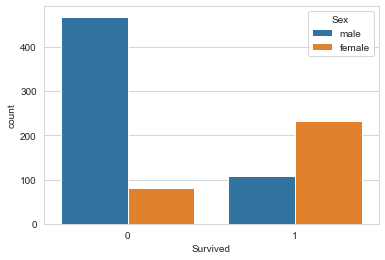

In [36]:
sns.countplot(hue='Sex',data=train,x='Survived')

## Visualze on the basis of 1st,2nd and 3rd class seating

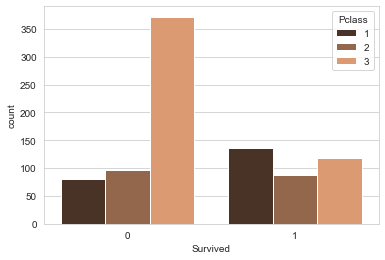

In [41]:
sns.countplot(hue='Pclass',data=train,x='Survived',palette='copper')

## Visualize Age using distplot() or histogram

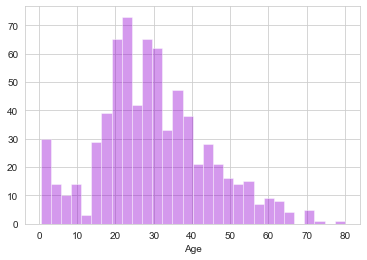

In [54]:
#method 1

sns.distplot(train['Age'].dropna(),kde=False,color='darkviolet',bins=30)


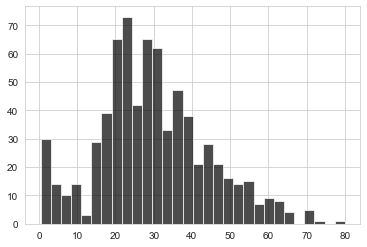

In [58]:
#method 2

train['Age'].hist(bins=30,color='black',alpha=0.7)

    #alpha-->color thickness

## Count the people who have spouse or sibblings

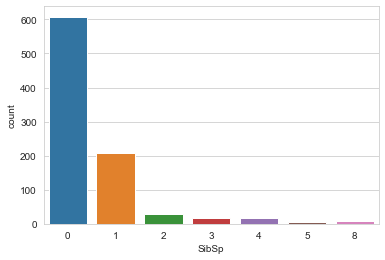

In [60]:
sns.countplot(x='SibSp',data=train)

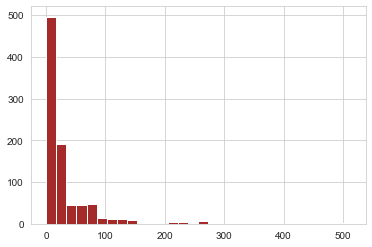

In [62]:
train['Fare'].hist(bins=30,color='brown')

## Data cleaning

We want to fill in missing age data instead of just dropping the missing age data rows.One way to do this is by filling in the mean age of all the passengers(imputation).However we can be smarter about this and check the average age by passenger class.

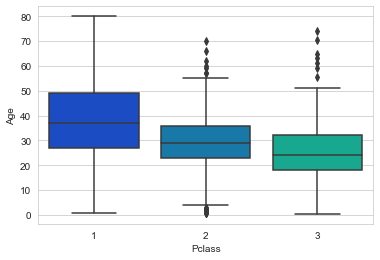

In [65]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see whether the passengers in the higher class tend to be older,which makes sense.We will use these average age values to impute based on Pclass for age.

In [83]:
def impute_age(cols):
    
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 25
    else:
        return Age
       

In [91]:
#Apply the function

train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

#axis=1--->apply function to each column


In [87]:
print(train['Age'])

0      25
1      37
2      25
3      37
4      25
       ..
886    29
887    37
888    25
889    37
890    25
Name: Age, Length: 891, dtype: int64


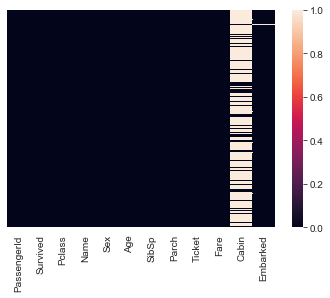

In [92]:
#lets check heatmap now
sns.heatmap(train.isnull(),yticklabels=False)

In [93]:
#Drop cabin column

train.drop('Cabin',axis=1,inplace=True)

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25,0,0,373450,8.0500,S


In [95]:
#Removing missing values

train.dropna(inplace=True)

In [96]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25,0,0,373450,8.0500,S


# Converting categorical features

We'll need to convert categorical features to dummy variables using pandas,otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    int64  
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [101]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [102]:
#Convert categorical variable into dummy/indicator variables

sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [103]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [104]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,25,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,25,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,25,0,0,8.0500


In [107]:
train=pd.concat([train,sex,embark],axis=1)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,25,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,25,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,25,0,0,8.0500,1,0,1


# Building a logistic regression model

## Training Test Split

In [110]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,25,1,0,7.2500,1,0,1
1,2,1,37,1,0,71.2833,0,0,0
2,3,3,25,0,0,7.9250,0,0,1
3,4,1,37,1,0,53.1000,0,0,1
4,5,3,25,0,0,8.0500,1,0,1


In [111]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

## Training and predicting

In [114]:
from sklearn.linear_model import LogisticRegression

In [116]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Kiran Sunkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
predictions=logmodel.predict(x_test)

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
accuracy=confusion_matrix(y_test,predictions)

In [120]:
accuracy

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [121]:
from sklearn.metrics import accuracy_score

In [123]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [124]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)